Problem 1: The data set “Mymensingh.csv” is the historical climate record on different atmospheric
parameters of the location Mymensingh. Fit the Artificial Neural Network (ANN) model to the
atmospheric data from the region Mymensingh of Bangladesh to classify the rainfall (RAN) category
[No Rain and Trace (NRT), Light Rain (LTR), Moderate and High Rain (MHR)] based on
Temperature (TEM), Dew Point Temperature (DPT), Wind Speed (WIS), Humidity (HUM), and Sea
Level Pressure (SLP). Use Seventy-five percent observation as training data and the rest of data as
test data. Hence find the prediction accuracy rate and error rate for test data and training data. You
must use the last six digits of your ID as a random seed point to draw the training data.

In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
 
# importing ANN libraries
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import regularizers
from keras import callbacks

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
file_path="/content/Mymensingh.csv"

#read the data and convert into DataFrame
df=pd.DataFrame(pd.read_csv(file_path))

In [3]:
df.shape


(672, 12)

In [4]:
df.head(5)

,ID,Station,Year,Month,TEM,DPT,WIS,HUM,SLP,T_RAN,A_RAIN,RAN
0,1,Mymensingh,1960,1,16.9,11.3,2.0,73.39,1016.0,15,0.48,NRT
1,2,Mymensingh,1960,2,21.4,12.6,1.7,66.34,1013.0,0,0.00,NRT
2,3,Mymensingh,1960,3,24.1,14.9,2.3,64.13,1011.4,69,2.23,LTR
3,4,Mymensingh,1960,4,29.9,17.6,2.2,59.03,1007.1,27,0.90,NRT
4,5,Mymensingh,1960,5,29.6,23.2,2.4,73.45,1003.4,187,6.03,LTR


# **Data Pre-Processing**

Dropping features according to assignment instruction.

In [5]:
df = df.drop(["ID", "Station","Year","Month","T_RAN","A_RAIN"], axis = 1)
df.head(5)

,TEM,DPT,WIS,HUM,SLP,RAN
0,16.9,11.3,2.0,73.39,1016.0,NRT
1,21.4,12.6,1.7,66.34,1013.0,NRT
2,24.1,14.9,2.3,64.13,1011.4,LTR
3,29.9,17.6,2.2,59.03,1007.1,NRT
4,29.6,23.2,2.4,73.45,1003.4,LTR


In [6]:
#Checking unique values of dependent features
print(df['RAN'].value_counts())

NRT    264
LTR    250
MHR    158
Name: RAN, dtype: int64


In [7]:
# Checking columns list and missing values
df.isnull().sum()

TEM    18
DPT    15
WIS     0
HUM    18
SLP    18
RAN     0
dtype: int64

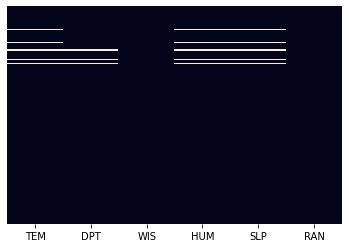

In [8]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [9]:
#Printing a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEM     654 non-null    float64
 1   DPT     657 non-null    float64
 2   WIS     672 non-null    float64
 3   HUM     654 non-null    float64
 4   SLP     654 non-null    float64
 5   RAN     672 non-null    object 
dtypes: float64(5), object(1)
memory usage: 31.6+ KB


As the number of missing values are less than 20% of the total data elements, I will replace the NAN values with the mean of each column.

In [10]:
# Basic nan munging. Fill each row's nans with the mean of the feature

df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#Printing a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEM     672 non-null    float64
 1   DPT     672 non-null    float64
 2   WIS     672 non-null    float64
 3   HUM     672 non-null    float64
 4   SLP     672 non-null    float64
 5   RAN     672 non-null    object 
dtypes: float64(5), object(1)
memory usage: 31.6+ KB


In [12]:
#Printing a concise summary of the dataframe
df.describe()

,TEM,DPT,WIS,HUM,SLP
count,672.000000,672.000000,672.000000,672.000000,672.000000
mean,25.289602,20.323288,2.549107,79.120795,1008.213609
std,3.804619,5.074564,1.467420,7.810010,5.417935
min,15.400000,0.000000,0.000000,47.640000,985.000000
25%,22.700000,15.700000,1.600000,74.605000,1003.500000
50%,26.900000,21.900000,2.300000,80.665000,1008.213609
75%,28.300000,24.700000,3.400000,85.175000,1013.300000
max,30.900000,27.000000,9.800000,91.630000,1017.200000


In [13]:
#converting the probable categorical value into binary form for ease of operation
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
df['RAN'] = lb.fit_transform(df['RAN'])
print(df['RAN'])


0      2
1      2
2      0
3      2
4      0
      ..
667    1
668    0
669    0
670    2
671    2
Name: RAN, Length: 672, dtype: int64


In [14]:
lb.transform(['LTR', 'MHR', 'NRT'])

array([0, 1, 2])

**Standard Scaling **

In [15]:
#use of StandardScaler to remove the mean and scales of each feature to unit variance.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df),columns = df.columns)
scaled_df.head()

,TEM,DPT,WIS,HUM,SLP,RAN
0,-2.206752,-1.779465,-0.374478,-0.734322,1.438222,1.119910
1,-1.023098,-1.523095,-0.579070,-1.637682,0.884093,1.119910
2,-0.312906,-1.069516,-0.169885,-1.920863,0.588557,-1.167565
3,1.212692,-0.537054,-0.238083,-2.574358,-0.205694,1.119910
4,1.133782,0.567311,-0.101687,-0.726634,-0.889120,-1.167565


In [16]:
#Selection of independent features ['TEM','DPT', 'WIS', 'HUM', 'SLP']] and dependent features
X = df.drop('RAN', axis=1)
Y = df['RAN']

In [17]:
#I use model_selection.train_test_split from sklearn library to split the data into training and testing sets.
#I set test_size=0.25 and random_state=216021. It means I split the existing dataset into 75% for data training, 
#and 25% for data test

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.25, random_state=216021)


# **ANN MODEL BUILDING**

In this project, we build an artificial neural network.

Following steps are involved in the model building

*   Initialising the neural network
*   Defining by adding layers
*   Compiling the neural network
*   Train the neural network








In [18]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
13/13 [==============================] - 1s 34ms/step - loss: 0.6892 - accuracy: 0.2308 - val_loss: 0.6891 - val_accuracy: 0.2673
Epoch 2/150
13/13 [==============================] - 0s 8ms/step - loss: 0.6873 - accuracy: 0.2308 - val_loss: 0.6868 - val_accuracy: 0.2673
Epoch 3/150
13/13 [==============================] - 0s 11ms/step - loss: 0.6840 - accuracy: 0.2308 - val_loss: 0.6841 - val_accuracy: 0.2673
Epoch 4/150
13/13 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.2308 - val_loss: 0.6805 - val_accuracy: 0.2673
Epoch 5/150
13/13 [==============================] - 0s 8ms/step - loss: 0.6761 - accuracy: 0.2308 - val_loss: 0.6760 - val_accuracy: 0.2673
Epoch 6/150
13/13 [==============================] - 0s 10ms/step - loss: 0.6689 - accuracy: 0.2308 - val_loss: 0.6701 - val_accuracy: 0.2673
Epoch 7/150
13/13 [==============================] - 0s 9ms/step - loss: 0.6637 - accuracy: 0.2308 - val_loss: 0.6624 - val_accuracy: 0.2673
Epoch 8/15

Plotting training and validation loss over epochs

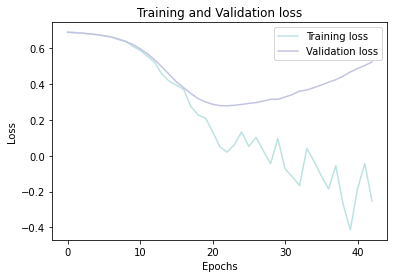

In [19]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

Plotting training and validation accuracy over epochs

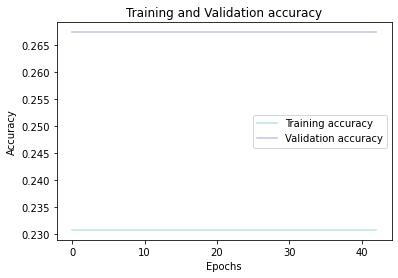

In [20]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**CONCLUSIONS**


Concluding the model with:
*   Testing on the test set
*   Evaluating the confusion matrix
*   Evaluating the classification reportList item


In [21]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

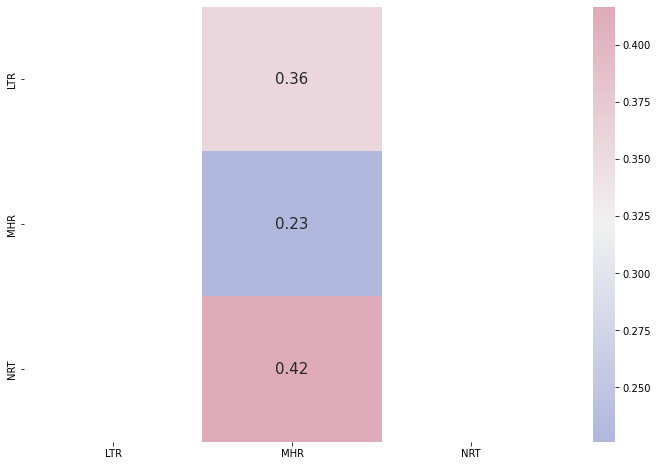

In [22]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix=pd.DataFrame(data=confusion_matrix(y_test,y_pred),columns=['LTR', 'MHR', 'NRT'],index=['LTR', 'MHR', 'NRT'])
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.23      1.00      0.37        38
           2       0.00      0.00      0.00        70

    accuracy                           0.23       168
   macro avg       0.08      0.33      0.12       168
weighted avg       0.05      0.23      0.08       168



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Problem: 2**

The atmospheric monthly data on rainfall (in mm) (monthly total), temperature (in 0 C), dew point
temperature (in 0 C), wind speed (in Kph), sea level pressure (in hPa), and humidity (in %) are
collected by the data record station Chittagong (22.35, 91.82) of Bangladesh for the period of 1964-
2015.
Write a short report to predict the rainfall level using different machine learning approaces based on
Temperature, Dew Point Temperature, Wind Speed, Humidity, and Sea Level Pressure.

Hints: You can follow the following Report Structure- A suitable Title at top of the first page, Your
name and ID, Abstract with keywords, Introduction (include citation, motivation and objectives),
Methodology, Results and Discussions (include explanatory data analysis, summary statistics, graphs
or figures, expalnation of results from different models etc), Summary and Conclusion.

The solution below includes only the coding part of the above problem. The assignment hardcopy will be provided in the next class.

In [24]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
file_path="/content/Mymensingh.csv"

#read the data and convert into DataFrame
df=pd.DataFrame(pd.read_csv(file_path))

In [26]:
df.shape

(672, 12)

In [27]:
df.head(5)

,ID,Station,Year,Month,TEM,DPT,WIS,HUM,SLP,T_RAN,A_RAIN,RAN
0,1,Mymensingh,1960,1,16.9,11.3,2.0,73.39,1016.0,15,0.48,NRT
1,2,Mymensingh,1960,2,21.4,12.6,1.7,66.34,1013.0,0,0.00,NRT
2,3,Mymensingh,1960,3,24.1,14.9,2.3,64.13,1011.4,69,2.23,LTR
3,4,Mymensingh,1960,4,29.9,17.6,2.2,59.03,1007.1,27,0.90,NRT
4,5,Mymensingh,1960,5,29.6,23.2,2.4,73.45,1003.4,187,6.03,LTR


# **Data Pre-Processing**

Dropping features according to assignment instruction.

In [28]:
df = df.drop(["ID", "Station","Year","Month","T_RAN","A_RAIN"], axis = 1)
df.head(5)

,TEM,DPT,WIS,HUM,SLP,RAN
0,16.9,11.3,2.0,73.39,1016.0,NRT
1,21.4,12.6,1.7,66.34,1013.0,NRT
2,24.1,14.9,2.3,64.13,1011.4,LTR
3,29.9,17.6,2.2,59.03,1007.1,NRT
4,29.6,23.2,2.4,73.45,1003.4,LTR


In [29]:
#Checking unique values of dependent features
print(df['RAN'].value_counts())

NRT    264
LTR    250
MHR    158
Name: RAN, dtype: int64


In [30]:
# Checking columns list and missing values
df.isnull().sum()

TEM    18
DPT    15
WIS     0
HUM    18
SLP    18
RAN     0
dtype: int64

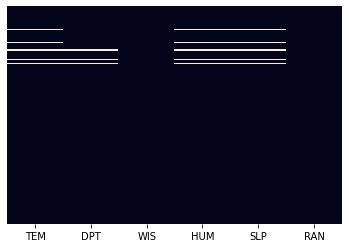

In [31]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [32]:
#Printing a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEM     654 non-null    float64
 1   DPT     657 non-null    float64
 2   WIS     672 non-null    float64
 3   HUM     654 non-null    float64
 4   SLP     654 non-null    float64
 5   RAN     672 non-null    object 
dtypes: float64(5), object(1)
memory usage: 31.6+ KB


As the number of missing values are less than 20% of the total data elements, I will replace the NAN values with the mean of each column.

In [33]:
# # Basic nan munging. Fill each row's nans with the mean of the feature

df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
#Printing a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEM     672 non-null    float64
 1   DPT     672 non-null    float64
 2   WIS     672 non-null    float64
 3   HUM     672 non-null    float64
 4   SLP     672 non-null    float64
 5   RAN     672 non-null    object 
dtypes: float64(5), object(1)
memory usage: 31.6+ KB


In [35]:
#Printing a concise summary of the dataframe
df.describe()

,TEM,DPT,WIS,HUM,SLP
count,672.000000,672.000000,672.000000,672.000000,672.000000
mean,25.289602,20.323288,2.549107,79.120795,1008.213609
std,3.804619,5.074564,1.467420,7.810010,5.417935
min,15.400000,0.000000,0.000000,47.640000,985.000000
25%,22.700000,15.700000,1.600000,74.605000,1003.500000
50%,26.900000,21.900000,2.300000,80.665000,1008.213609
75%,28.300000,24.700000,3.400000,85.175000,1013.300000
max,30.900000,27.000000,9.800000,91.630000,1017.200000


In [36]:
#converting the probable categorical value into binary form for ease of operation
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
df['RAN'] = lb.fit_transform(df['RAN'])
print(df['RAN'])

0      2
1      2
2      0
3      2
4      0
      ..
667    1
668    0
669    0
670    2
671    2
Name: RAN, Length: 672, dtype: int64


In [37]:
#converting the probable categorical value into binary form for ease of operation
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
df['RAN'] = lb.fit_transform(df['RAN'])
print(df['RAN'])

0      2
1      2
2      0
3      2
4      0
      ..
667    1
668    0
669    0
670    2
671    2
Name: RAN, Length: 672, dtype: int64


**Standard Scaling **

In [38]:
#use of StandardScaler to remove the mean and scales of each feature to unit variance.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df),columns = df.columns)
scaled_df.head()

,TEM,DPT,WIS,HUM,SLP,RAN
0,-2.206752,-1.779465,-0.374478,-0.734322,1.438222,1.119910
1,-1.023098,-1.523095,-0.579070,-1.637682,0.884093,1.119910
2,-0.312906,-1.069516,-0.169885,-1.920863,0.588557,-1.167565
3,1.212692,-0.537054,-0.238083,-2.574358,-0.205694,1.119910
4,1.133782,0.567311,-0.101687,-0.726634,-0.889120,-1.167565


In [39]:
#Selection of independent features ['TEM','DPT', 'WIS', 'HUM', 'SLP']] and dependent features
X = df.drop('RAN', axis=1)
Y = df['RAN']

In [40]:
#I use model_selection.train_test_split from sklearn library to split the data into training and testing sets.
#I set test_size=0.25 and random_state=216021. It means I split the existing dataset into 75% for data training, 
#and 25% for data test

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.25, random_state=216021)


# **Applying Classification Modelling**
Here, I will apply Logistic Regression, KNN Classification, Decesion Tree, Random Forest and Naive Bayes algorithm to classify the dependent feature.

Following steps are involved in the model building

*   Identifying optimal k value for KNN classifier.
*   Identifying optimal number of features for logistic regression.
*   Fitting data into classification models.
*   Evaluating the performance of the models.

**Optimal Value of K for KNN**

Minimum error:- 0.22023809523809523 at K = 15


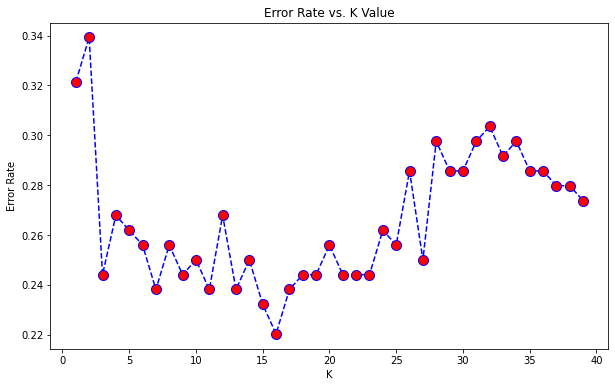

In [41]:
# Optimal Value of k and Accuracy Rate for Optimal k

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

**Optimal number of features for logistic regression**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Optimal number of features : 4


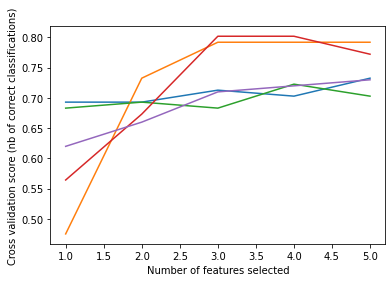

In [42]:
from sklearn.feature_selection import RFECV
log=LogisticRegression(random_state=7)

min_features_to_select=1
rfecv=RFECV(estimator=log,step=1,cv=5,scoring="accuracy",min_features_to_select=min_features_to_select)
rfecv.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_)+min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [43]:
rfetable=pd.DataFrame({"Feature":X_train.columns,"Support":rfecv.support_,"Ranking":rfecv.ranking_,}).sort_values(by="Ranking",ascending=False)
rfetable

,Feature,Support,Ranking
4,SLP,False,2
0,TEM,True,1
1,DPT,True,1
2,WIS,True,1
3,HUM,True,1



Recurssive feature elimination suggests we can remove some columns to the optimal amount of 4. But we will not do that for further analysis.

# **Training the classification models**

In [44]:
#Appling Logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

#Appling KNeighbors classifier model on the training set

from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier(n_neighbors=15)
knn_cls.fit(X_train, y_train)

#Appling Decision Tree classifier model on the training set

from sklearn.tree import DecisionTreeClassifier 
dec_tree_cls=DecisionTreeClassifier(random_state = 0) 
dec_tree_cls.fit(X_train,y_train)

#Appling Random Forest Regressor model on the training set

from sklearn.ensemble import RandomForestClassifier
random_forest_cls = RandomForestClassifier()
random_forest_cls.fit(X_train, y_train)

#Appling Naive Bayes classifier model on the training set

from sklearn.naive_bayes import GaussianNB  
naive_bayes_cls = GaussianNB()
naive_bayes_cls.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GaussianNB()

# **Evaluating the models**

In [45]:
from sklearn.metrics import mean_squared_error, f1_score
def rmse_score(model, X_train, X_test, y_train, y_test):
    mse_train = mean_squared_error(y_true = y_train,
                                  y_pred = model.predict(X_train))
    mse_test = mean_squared_error(y_true = y_test,
                                  y_pred = model.predict(X_test))
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5
    
    print("The training RMSE for " + str(model) + " is: " + str(rmse_train))
    print("The testing RMSE for " + str(model) + " is: " + str(rmse_test))
    return (rmse_train, rmse_test)

In [46]:
def cm(predictions):
    cm_matrix=pd.DataFrame(data=confusion_matrix(y_test,predictions),columns=['LTR', 'MHR', 'NRT'],index=['LTR', 'MHR', 'NRT'])
    sns.heatmap(cm_matrix,annot=True,square=True,fmt="d",cmap="Purples",linecolor="w",linewidth=2)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.yticks(va="center")

**Logistic Regression**

In [47]:
x1,y1 = rmse_score(logistic_reg, X_train, X_test, y_train, y_test)

The training RMSE for LogisticRegression() is: 0.7453559924999299
The testing RMSE for LogisticRegression() is: 0.7791937224739796


In [48]:
y_predict=logistic_reg.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        60
           1       0.62      0.82      0.70        38
           2       0.86      0.86      0.86        70

    accuracy                           0.73       168
   macro avg       0.71      0.74      0.72       168
weighted avg       0.74      0.73      0.73       168



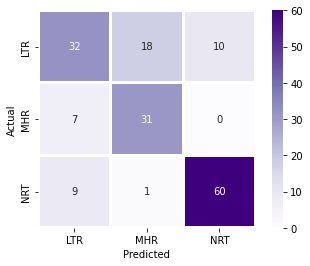

In [49]:
cm_log=cm(y_predict)
cm_log

In [50]:
print("Training set Accuracy score: {num:.4f}.".format(num=logistic_reg.score(X_train,y_train)))
print("Testing set Accuracy score: {num:.4f}.".format(num=logistic_reg.score(X_test,y_test)))

Training set Accuracy score: 0.7540.
Testing set Accuracy score: 0.7321.


**KNN Classifier**

In [51]:
x2,y2= rmse_score(knn_cls, X_train, X_test, y_train, y_test)

The training RMSE for KNeighborsClassifier(n_neighbors=15) is: 0.8054871344779654
The testing RMSE for KNeighborsClassifier(n_neighbors=15) is: 0.7196229171289245


In [52]:
y_predict=knn_cls.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65        60
           1       0.67      0.76      0.72        38
           2       0.85      0.91      0.88        70

    accuracy                           0.77       168
   macro avg       0.75      0.76      0.75       168
weighted avg       0.77      0.77      0.76       168



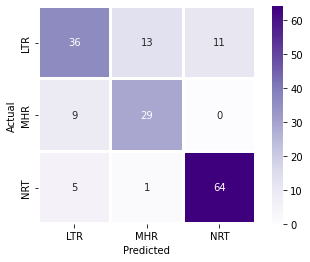

In [53]:
cm_knn=cm(y_predict)
cm_knn

In [54]:
print("Training set Accuracy score: {num:.4f}.".format(num=knn_cls.score(X_train,y_train)))
print("Testing set Accuracy score: {num:.4f}.".format(num=knn_cls.score(X_test,y_test)))

Training set Accuracy score: 0.7262.
Testing set Accuracy score: 0.7679.


**Decision Tree Classifier**

In [55]:
x3,y3= rmse_score(dec_tree_cls, X_train, X_test, y_train, y_test)

The training RMSE for DecisionTreeClassifier(random_state=0) is: 0.0
The testing RMSE for DecisionTreeClassifier(random_state=0) is: 0.9940297973880049


In [56]:
y_predict=dec_tree_cls.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.44      0.47      0.46        60
           1       0.50      0.50      0.50        38
           2       0.76      0.73      0.74        70

    accuracy                           0.58       168
   macro avg       0.57      0.57      0.57       168
weighted avg       0.59      0.58      0.59       168



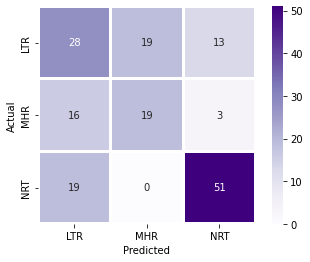

In [57]:
cm_dt=cm(y_predict)
cm_dt

In [58]:
print("Training set Accuracy score: {num:.4f}.".format(num=dec_tree_cls.score(X_train,y_train)))
print("Testing set Accuracy score: {num:.4f}.".format(num=dec_tree_cls.score(X_test,y_test)))

Training set Accuracy score: 1.0000.
Testing set Accuracy score: 0.5833.


**Random Forest Classifier**

In [59]:
x4, y4= rmse_score(random_forest_cls, X_train, X_test, y_train, y_test)


The training RMSE for RandomForestClassifier() is: 0.0
The testing RMSE for RandomForestClassifier() is: 0.8273595406616217


In [60]:
y_predict=random_forest_cls.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58        60
           1       0.63      0.71      0.67        38
           2       0.83      0.84      0.84        70

    accuracy                           0.71       168
   macro avg       0.69      0.70      0.69       168
weighted avg       0.71      0.71      0.71       168



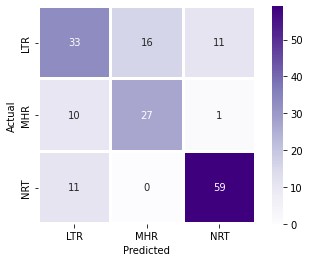

In [61]:
cm_rm=cm(y_predict)
cm_rm

In [62]:
print("Training set Accuracy score: {num:.4f}.".format(num=random_forest_cls.score(X_train,y_train)))
print("Testing set Accuracy score: {num:.4f}.".format(num=random_forest_cls.score(X_test,y_test)))

Training set Accuracy score: 1.0000.
Testing set Accuracy score: 0.7083.


**Naive Bayes classifier**

In [63]:
x5, y5= rmse_score(naive_bayes_cls, X_train, X_test, y_train, y_test)


The training RMSE for GaussianNB() is: 0.8321420055857759
The testing RMSE for GaussianNB() is: 0.8694552207862006


In [64]:
y_predict=naive_bayes_cls.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.57      0.38      0.46        60
           1       0.56      0.92      0.69        38
           2       0.85      0.79      0.81        70

    accuracy                           0.67       168
   macro avg       0.66      0.70      0.66       168
weighted avg       0.68      0.67      0.66       168



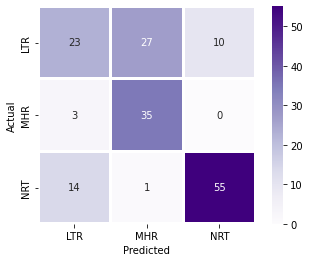

In [65]:
cm_bayes=cm(y_predict)
cm_bayes

In [66]:
print("Training set Accuracy score: {num:.4f}.".format(num=naive_bayes_cls.score(X_train,y_train)))
print("Testing set Accuracy score: {num:.4f}.".format(num=naive_bayes_cls.score(X_test,y_test)))

Training set Accuracy score: 0.6766.
Testing set Accuracy score: 0.6726.


# **Plotting the Results**

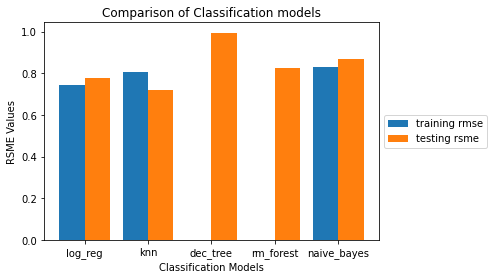

In [67]:

X = ['log_reg','knn','dec_tree','rm_forest','naive_bayes' ]
train = [x1,x2,x3,x4,x5]
test = [y1,y2,y3,y4,y5]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, train, 0.4, label = 'training rmse')
plt.bar(X_axis + 0.2, test, 0.4, label = 'testing rsme')
  
plt.xticks(X_axis, X)
plt.xlabel("Classification Models")
plt.ylabel("RSME Values")
plt.title("Comparison of Classification models")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

From the analysis of the RMSE scores of the above classification models it can be clearly stated that Decesion Tree and Random Forest models overfit the training dataset, and hence to be discarded for this problem. From the model Logistics Regression and Naive Bayes it is visible that the rmse score for test data is higher than KNN classifier. So, KNN classifier has the highest prediction accuracy for this problem.

[Online Link of this notebook](https://colab.research.google.com/drive/1BUtLRuTJlLDB41tJJIblNYQ-yv98rmEF?usp=sharing)